In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
data.corr()

,show_id,release_year
show_id,1.000000,0.566577
release_year,0.566577,1.000000


* **show_id** ve **release_year** dışında bütün verimiz string.
* **date_added** kolonunu datetime nesnesine çevirelim.

In [5]:
print(type(data.date_added[1]))
data.date_added=pd.to_datetime(data.date_added)
print(type(data.date_added[1]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Netflix' de en çok filmi olan 10 ülke

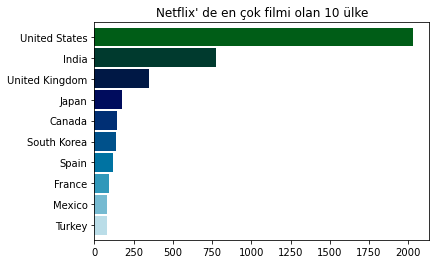

In [7]:
en_cok_filmi_olan_ulke = data.country.value_counts()[:10]
pd.Series(en_cok_filmi_olan_ulke).sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('ocean_r', 10))
plt.title("Netflix' de en çok filmi olan 10 ülke")
plt.show()

## Dizi mi ? Film mi ?

Netflix'de yayınlanan showlarda dizi-film oranına bakalım.

Datamızı incelediğimizde **type**'da 2 farklı değerimiz vardı **Movie** ve **Tv Show**. Gösterim için Pie Chart'ı kullanalım.

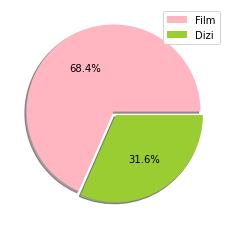

In [8]:
labels = 'Film', 'Dizi'
sizes = data['type'].value_counts()
colors = ["lightpink", "yellowgreen"]
explode=(0.05,0) # chartın 1. parçasını 2. parçadan 0.05 kırdık
plt.pie(sizes,colors=colors,explode=explode, autopct='%1.1f%%',shadow=True) # shadow ile chartımızı gölgelendirdik
plt.legend(labels,loc='upper right') # loc ile labellarımızı sağ üst köşeye yerleştirdik
plt.show()

## Yıllara göre içerik artışı

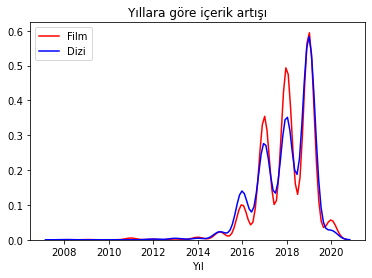

In [9]:
# İçeriklerin eklendiği yılları, ayrı bir kolon olarak ekliyoruz.
data['year']=data['date_added'].apply(lambda x: x.year)

data_movie=data[data['type']=='Movie'] # type ı Movie olanlar
data_tv_show=data[data['type']=='TV Show'] # type ı Movie olanlar
## density plot
sns.distplot(data_movie.year,hist=False, color="r",label="Film")
sns.distplot(data_tv_show.year, hist=False,color="b",label="Dizi")
plt.title('Yıllara göre içerik artışı')
plt.xlabel("Yıl")
plt.show()

2016 yılına kadar Netflix'e eklenen içerikler çoğunlukla (küçük bir farkla) dizi iken ağırlık filmlere verilmiş. Yaklaşık 2 yıl süren filmin liderliği sonrasında ise dizi içerikleri ani bir çıkışla film ile arasını kapatmış.

## Film ve dizilerin reytingleri

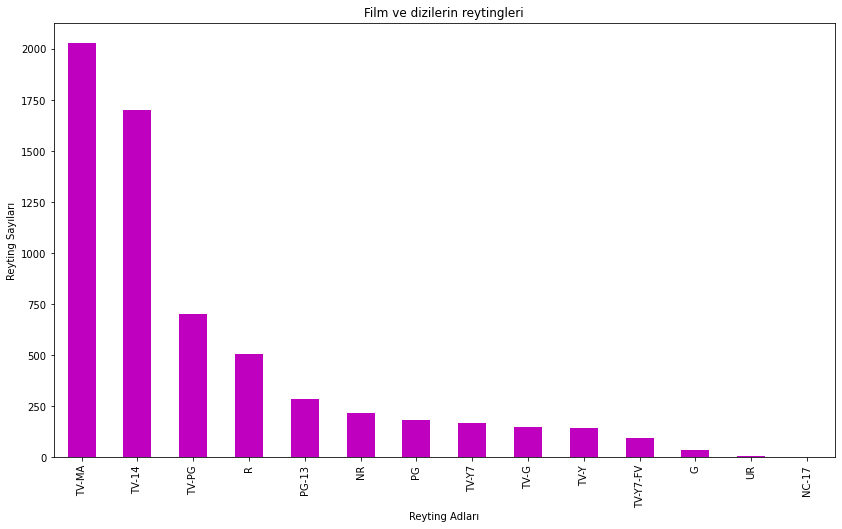

In [10]:
data.rating.value_counts().plot(kind='bar',figsize=(14,8),title='Film ve dizilerin reytingleri',color='m')
plt.xlabel('Reyting Adları')
plt.ylabel('Reyting Sayıları')
plt.show()